## MDL assignment 1

#### Importing the necessary libraries

In [21]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from array import *

#### Loading the pickled data

In [22]:
with open('data/train.pkl','rb') as tr:
    train = pickle.load(tr)
with open('data/test.pkl','rb') as te:
    test = pickle.load(te)

#### Preprocessing the data

In [23]:
x_test = np.array([i[0] for i in test]).reshape(-1,80)      # 80 features in test set
y_test = np.array([i[1] for i in test]).reshape(-1,80)      

#### Splitting train into 16 sets

In [24]:
x_train = np.array([i[0] for i in train]).reshape(-1,500)   # 500 features in each of the 16 train sets
y_train = np.array([i[1] for i in train]).reshape(-1,500)

#### Making the predictions

In [25]:
polymial_degree = 15                                        # Polynomial degree
x_vec_train = np.zeros(shape=(16, 16))                      # 16 x 16 matrix to store the train set
Y_pred = []                                                 # List to store the predicted values
for segment in range(16):                                   # 16 segments
    y_pred = []                                             # List to store the predicted values for each segment
    for i in range(1, 16):                                  # upto degree 15
        poly = PolynomialFeatures(degree=i, include_bias=False)
                                                            # Polynomial features 
        X = poly.fit_transform(x_train[segment].reshape(-1, 1))
                                                            # 2D array of train set   
        Y = y_train[segment]                                                   
        model = LinearRegression().fit(X, Y)                # the y = ax2+bx+c (etc) part
        X_test = poly.fit_transform(x_test.reshape(-1, 1))  # 2D array of test set
        y_pred.append(model.predict(X_test))                # predicted values for each segment
    Y_pred.append(y_pred)                                   # predicted values for each segment

Y_pred = np.array(Y_pred)                                   # 2D array of predicted values

#### Calculating bias and variance

In [26]:
# Initializing the lists of variables we'll use to store the results

bias_2 = []                                                 # List to store the bias^2 values
variance = []                                               # List to store the variance values
mse = []                                                    # List to store the mean squared error values
bias = []                                                   # List to store the bias values
irreducible = []                                            # List to store the irreducible error values
total_error = []                                            # List to store the total error values

x_test = x_test.transpose()                                 # Transpose the test set
y_test = y_test.flatten()                                   # Flatten the test set

E_fcap_x = np.mean(Y_pred, axis=0)                          # Mean of the predicted values for each segment
bias_2 = np.mean(np.square((np.subtract(E_fcap_x, y_test))), axis = 1)
                                                            # Mean of the bias^2 values for each segment
variance = np.mean(np.mean(np.square(np.subtract(E_fcap_x, Y_pred)), axis = 2), axis = 0)
                                                            # Mean of the variance values for each segment
mse = np.mean(np.square(np.subtract(y_test, Y_pred)), axis=0)
                                                            # Mean of the mean squared error values for each segment
mse = np.mean(mse, axis=1)                                  
irreducible = mse - bias_2 - variance                       # Mean of the irreducible error values for each segment   
bias = np.sqrt(bias_2)                                      # Mean of the bias values for each segment
total_error = mse   

#### Plotting variance, bias, irreducible error, total error

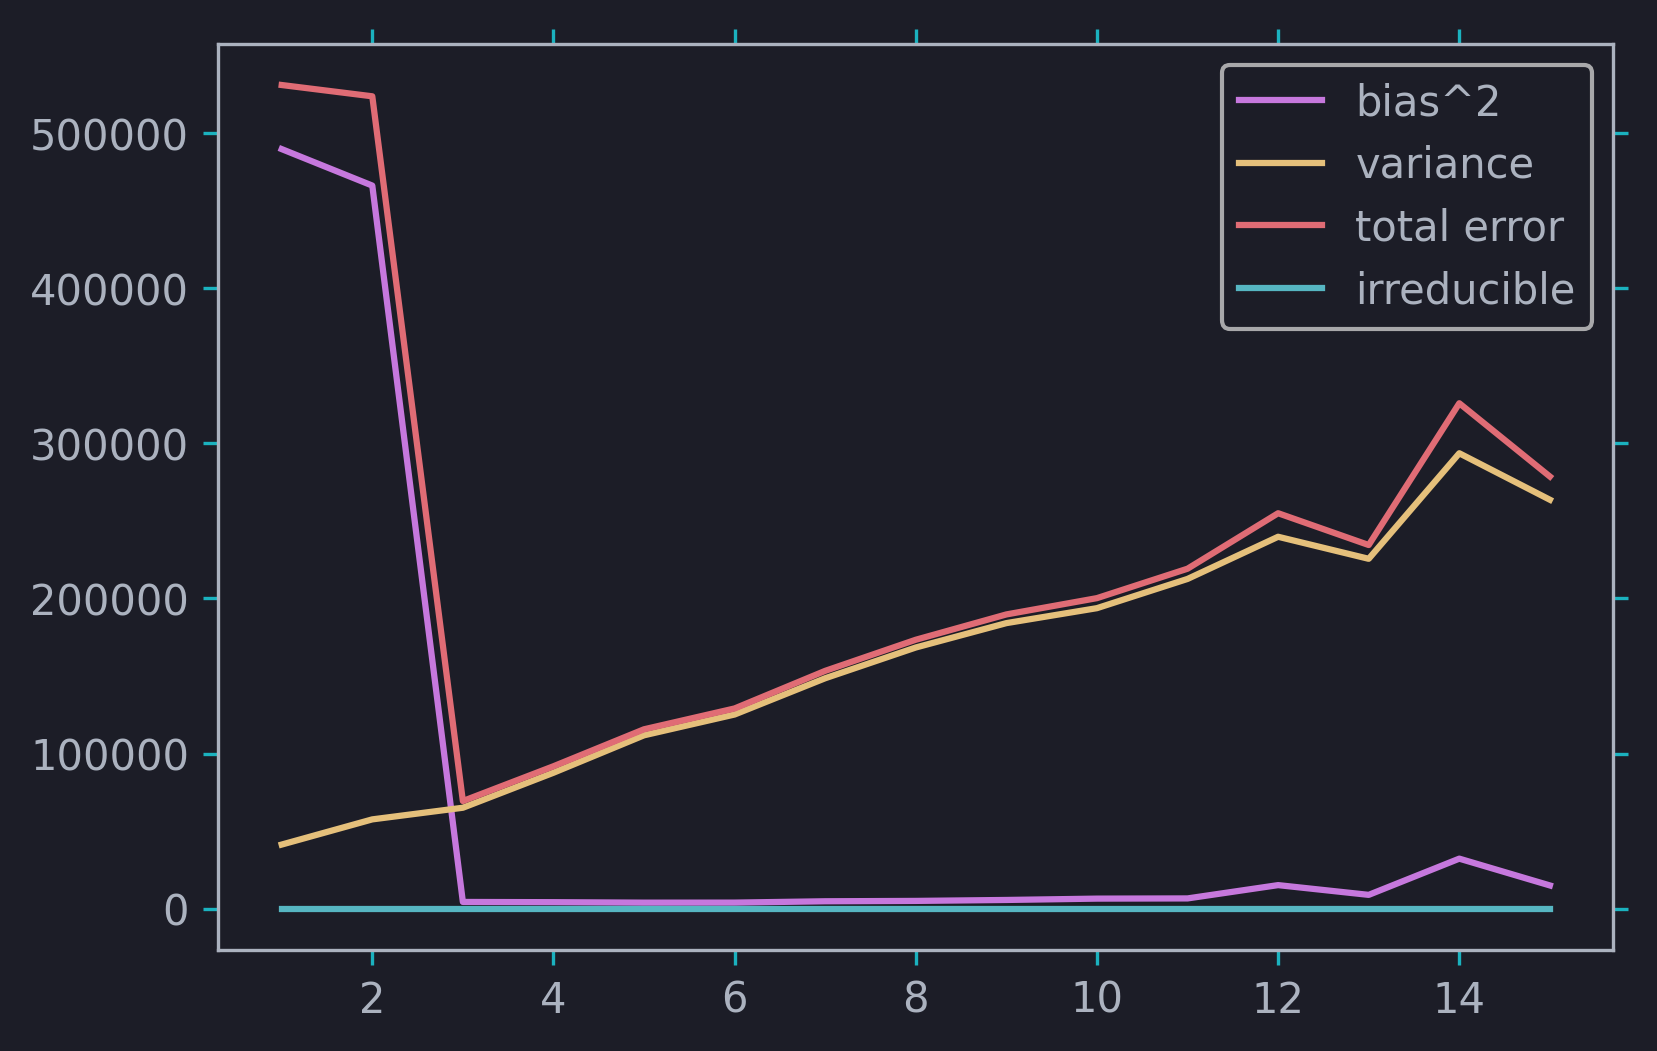

In [29]:
degree = np.arange(1, 16)
plt.figure(dpi=300)
plt.plot(degree, bias_2, label="bias^2", color="#c678dd")
plt.plot(degree, variance, label="variance", color="#e5c07b")
plt.plot(degree, total_error, label="total error", color="#e06c75")
plt.plot(degree, irreducible, label="irreducible", color="#56b6c2")
plt.legend()

plt.rcParams['axes.facecolor'] = '#1c1d27'
plt.rcParams['axes.titlecolor'] = '#abb2bf'
plt.rcParams['axes.edgecolor'] = '#abb2bf'
plt.rcParams['axes.labelcolor'] = '#abb2bf'
plt.rcParams['figure.facecolor'] = '#1c1d27'
plt.rcParams['legend.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.color'] = '#1bb2bf'
plt.rcParams['ytick.color'] = '#1bb2bf'
plt.rcParams['text.color'] = '#abb2bf'
plt.rcParams['xtick.labelcolor'] = '#abb2bf'
plt.rcParams['ytick.labelcolor'] = '#abb2bf'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True
plt.show()

In [28]:
data = pd.DataFrame(
    {
        "degree": degree, 
        "bias_2": bias_2, 
        "variance": variance, 
        "total_error": total_error, 
        "bias": bias, 
        "irreducible": irreducible
    }
)
data

,degree,bias_2,variance,total_error,bias,irreducible
0,1,489774.535994,41322.989284,531097.525278,699.838936,1.455192e-11
1,2,466254.602804,57563.993945,523818.596749,682.828385,-5.820766e-11
2,3,4323.197476,65071.932606,69395.130082,65.751026,-7.275958e-12
3,4,4176.542958,87636.882093,91813.425052,64.626179,0.000000e+00
4,5,3876.961758,111779.926206,115656.887963,62.265253,2.910383e-11
5,6,3902.102341,125192.175118,129094.277459,62.466810,0.000000e+00
6,7,4759.094862,148574.152969,153333.247831,68.986193,-2.910383e-11
7,8,4994.542734,168398.428231,173392.970965,70.672079,0.000000e+00
8,9,5604.340519,184115.659393,189719.999912,74.862143,-2.910383e-11
9,10,6465.292113,193766.059409,200231.351522,80.407040,0.000000e+00
